In [1]:
import numpy as np
import pandas as pd
import scipy.constants as const
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import matplotlib as mpl

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

In [3]:
kvt_blip = np.genfromtxt('constr/kvt_blip.csv', delimiter = ',')
erid2 = np.genfromtxt('constr/erid_2.csv', delimiter = ',')
eros = np.genfromtxt('constr/eros.csv', delimiter = ',')
verma = np.genfromtxt('constr/verma.csv', delimiter = ',')
cmb = np.genfromtxt('constr/CMB_2.csv', delimiter = ',')

In [4]:
r = 1*const.parsec*1000
area = 4*np.pi*r**2
n_star = 1.4e9
t = 5*const.year
m_DM = 7e10
v = 166*1000
sigma = .1e-3*const.arcsec

rho_0 = 1e-2*2e30/const.parsec**3

SNR_min = 15

d_max = 4*const.G*2e30/(1000*const.parsec)/const.c**2

In [9]:
m_ar = np.arange(-6, 6)

slope2 = (sigma*SNR_min*const.c**2/const.G)**2*3/2560/n_star/(0.01*2e30/const.parsec**3)/r/(2e30)

slope = 3/2/n_star/(v*t)**2/(.01)/r*const.parsec**3/10

flat = 3*SNR_min/0.4/8*const.c**2*sigma/const.G/n_star/v/t/(.01*2e30/const.parsec**3)/r/np.sqrt(80)


f = slope*(np.exp(np.log(10)*m_ar))
f2 = slope2/(np.exp(np.log(10)*m_ar))

slope_strong = np.exp((12*np.log(SNR_min*sigma) + 6*np.log(v*t/640) + 9*np.log(const.c**2/const.G) +
 9*np.log(8) - 9*np.log(2e30) + 3*np.log(const.parsec) - np.log(.01)))*4*np.pi/3

f_strong = slope_strong/np.exp(8*np.log(10)*m_ar)

In [10]:
sigma_op = 1e-5*const.arcsec
t_op = 10*const.year

slope2_op = (sigma_op*SNR_min*const.c**2/const.G)**2*3/2560/n_star/(0.01*2e30/const.parsec**3)/r/(2e30)

slope_op = 3/2/n_star/(v*t_op)**2/(.01)/r*const.parsec**3/10

flat_op = 3*SNR_min/0.4/8*const.c**2*sigma_op/const.G/n_star/v/t_op/(.01*2e30/const.parsec**3)/r/np.sqrt(80)


f_op = slope_op*(np.exp(np.log(10)*m_ar))
f2_op = slope2_op/(np.exp(np.log(10)*m_ar))

slope_strong_op = np.exp((12*np.log(SNR_min*sigma_op) + 6*np.log(v*t_op/640) + 9*np.log(const.c**2/const.G) +
 9*np.log(8) - 9*np.log(2e30) + 3*np.log(const.parsec) - np.log(.01)))*4*np.pi/3

f_strong_op = slope_strong_op/np.exp(8*np.log(10)*m_ar)

In [11]:
p_lim = np.zeros((5,2))

p_lim[0] = [5, slope*1e5]
p_lim[1] = [np.log10(flat/slope),flat]
p_lim[2] = [np.log10(slope2/flat),flat]
p_lim[3] = [np.log10((slope_strong/slope2)**(1/7)), slope2/(slope_strong/slope2)**(1/7)]
p_lim[4] = [np.log10(slope_strong)/8,1]

In [13]:
p_lim_op = np.zeros((5,2))

p_lim_op[0] = [5, slope_op*1e5]
p_lim_op[1] = [np.log10(flat_op/slope_op),flat_op]
p_lim_op[2] = [np.log10(slope2_op/flat_op),flat_op]
p_lim_op[3] = [np.log10((slope_strong_op/slope2_op)**(1/7)), slope2_op/(slope_strong_op/slope2_op)**(1/7)]
p_lim_op[4] = [np.log10(slope_strong_op)/8,1]

In [12]:
cmb = np.genfromtxt('constr/CMB_2.csv', delimiter = ',')
f_cmb = interp.interp1d(np.log10(cmb[:,1]),np.log10(cmb[:,0]), fill_value="extrapolate")
cmb = np.array([[f_cmb(0),   1e0],
                [f_cmb(-10), 1e-10]])

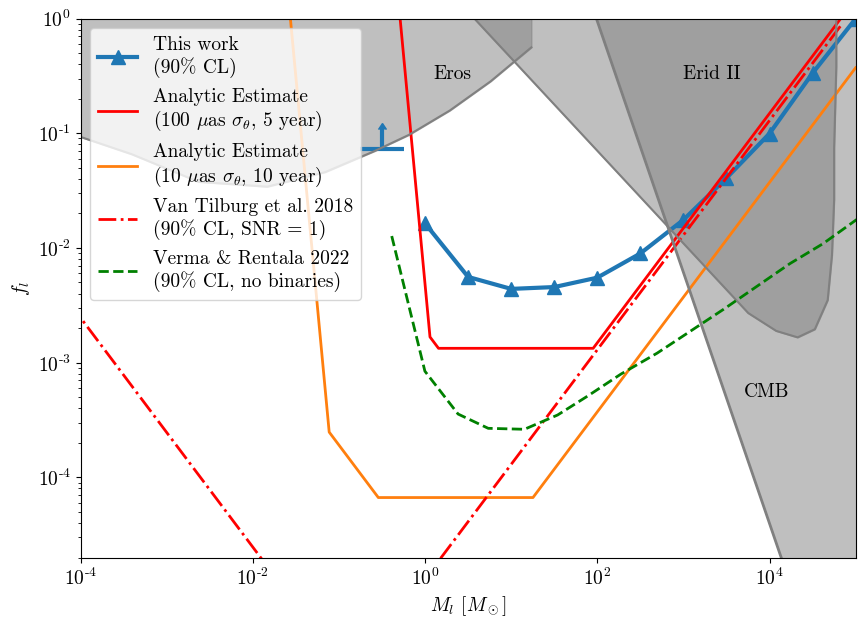

In [35]:
plt.figure(figsize = (10, 7))

plt.plot(10**np.array([5,4.5, 4,3.5,3,2.5,2,1.5,1,0.5, 0]), 
                                   [0.9966003726758029,
                                    0.33400175436188,
                                    0.09941772409363554,
                                    0.040675040664489535,
                                    0.01756979170745691,
                                    0.008950216825655293,
                                    0.005508260210231061,
                                    0.0045603494255830905,
                                    0.004394502484151107,
                                    0.005588282293733946,
                                    0.016359060300228427], 
         color = 'tab:blue', marker = '^', markersize = 10, linestyle = '-', lw = 3, label = 'This work\n(90% CL)')




plt.plot(10**(p_lim[:,0]), p_lim[:,1], 'r-', lw = 2, 
         label = 'Analytic Estimate\n(100 $\mu$as $\sigma_\\theta$, 5 year)')

plt.plot(10**(p_lim_op[:,0]), p_lim_op[:,1], color = 'tab:orange', lw = 2, 
         label = 'Analytic Estimate\n(10 $\mu$as $\sigma_\\theta$, 10 year)')


plt.plot(10**(kvt_blip[:,0]), kvt_blip[:,1], 'r-.', lw = 2,
         label = 'Van Tilburg et al. 2018\n(90% CL, SNR = 1)')

plt.yscale('log')

plt.plot(10**(erid2[:,0]), erid2[:,1], 'gray')
plt.plot(10**(eros[:,0]), eros[:,1], 'gray')

plt.plot(10**(cmb[:,0]), cmb[:,1], 'gray', lw = 2)
plt.plot(10**(verma[:,0]), verma[:,1], 'g--', lw = 2,
         label = 'Verma & Rentala 2022\n(90% CL, no binaries)')

plt.yscale('log')
plt.xscale('log')
plt.ylim(2e-5, 1)
plt.xlabel('$M_l$ $[M_\odot]$')
plt.ylabel('$f_l$')
plt.xlim(1e-4, 1e5)
plt.fill_between(10**(erid2[:,0]), erid2[:,1], np.ones(len(erid2)), color = 'gray', alpha = .5)
plt.fill_between(10**(eros[:,0]), eros[:,1], np.ones(len(eros)), color = 'gray', alpha = .5)
plt.fill_between(10**(cmb[:,0]), cmb[:,1], np.ones(len(cmb)), color = 'gray', alpha = .5)

plt.legend(loc = 'upper left')

plt.text(1e3, 3e-1, 'Erid II')
plt.text(10**(.1), 3e-1, 'Eros')
plt.text(10**(3.7), 5e-4, 'CMB')

plt.errorbar(10**(-.5), np.log(10)/(100/np.sqrt(10)), xerr = [[10**(-.5) - 10**(-.75)],
                                                              [10**(-.25) - 10**(-.5)]], yerr = np.log(10)/(100/np.sqrt(10))/2, 
             color = 'tab:blue',linestyle = 'None' ,lolims = True, lw = 3)
plt.savefig('MACHO_constr.pdf', dpi = 500, bbox_inches = 'tight')